In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import re
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from pandas.core.frame import DataFrame

In [2]:
df = pd.read_csv("data/asset-data-export_O12QnL6kAl-640876dfe5066-1678276319.csv", delimiter=";", header=3)
df["Date/Time"] = pd.to_datetime(df["Date/Time"])



In [18]:
df["Manual outlier"] = -1
df["Manual outlier"][26] = 1
df["Manual outlier"][83] = 1
df["Manual outlier"][122] = 1
df.loc[25:30]

,Date/Time,"Water level, Nap (cm)",Manual outlier
25,2022-03-08 12:30:00,26,-1
26,2022-03-08 13:00:00,26,1
27,2022-03-08 13:30:04,26,-1
28,2022-03-08 14:00:00,26,-1
29,2022-03-08 14:30:00,24,-1
30,2022-03-08 15:00:00,23,-1


In [19]:
X = df["Water level, Nap (cm)"].values
y = df["Manual outlier"]

In [20]:
X = X.reshape((-1, 1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
model = DecisionTreeClassifier(criterion="entropy")

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9995434832230085


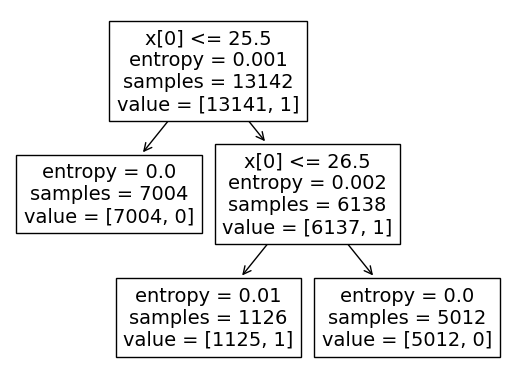

In [26]:
tree.plot_tree(model)
plt.show()

In [27]:
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.99942955, 0.99942955, 0.99942955, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [28]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [29]:
model.score(X_test, y_test)

0.9995434832230085